# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Valentino Ryo Koesdarto
- **Email:** valentinoryo10@gmail.com
- **ID Dicoding:** xvalnsz

---

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh tingkat pembelian suatu produk di wilayah tertentu berdasarkan ukuran produk tersebut ?
- Bagaimana pengaruh demografis wilayah customer terhadap lamanya waktu pengiriman produk tersebut ?

## Import Semua Packages/Library yang Digunakan

In [748]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Data Wrangling

### Gathering Data

In [749]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP


In [750]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [751]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [752]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight :**
- Insight yang bisa didapat dari `customers dataset (customers_dataset.csv)`, yaitu demografi customers. Hal tersebut dapat kita buat dengan mengelompokkan data berdasarkan *customer_state* dan *customer_city* untuk melihat daerah/kota mana yang memiliki customers terbanyak
- Insight yang bisa didapat dati `products dataset (products_dataset.csv)`, yaitu berat dan ukuran products. Informasi data seperti *product_weight_g*, *product_length_cm*, *product_height_cm*, dan *product_width_cm* dapat kita manfaatkan lebih lanjut untuk mengetahui apakah hal-hal tersebut berpengaruh terhadap tingkat pembelian customers maupun biaya pengiriman
- Insight yang bisa didapat dari `orders dataset (orders_dataset.csv)`, yaitu status pemesanan. Hal tersebut dapat kita buat dengan memanfaatkan informasi data seperti *order_status* untuk melihat berapa jumlah masing-masing untuk pesanan yang delivered, shipped, dan canceled yang nanti akan berpengaruh terhadap tingkat kepuasan customers
- Insight yang bisa didapat dari `order items dataset (order_items_dataset.csv)`, yaitu product dengan penjualan tertinggi. Hal tersebut dapat kita buat dengan mengelompokkan *product_id* dan menghitung total harga nya di kolom *price* yang nanti akan menjadi feedback kira-kira product jenis apa yang mempunyai minat pembelian tertinggi di kalangan customers yang ada

---

### Assessing Data

Menilai tabel `customers_dataset.csv`

In [753]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99442 entries, 0 to 99441
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99442 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  float64
 3   customer_city             99440 non-null  object 
 4   customer_state            99440 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


Tidak ada nilai kosong (missing values) di tiap kolomnya, karena setiap kolom memiliki jumlah non-null yang sama dengan total baris, yaitu 99.441. Untuk data type customer_zip_code_prefix, int64 akan tidak tepat jika ada value dengan awalan 0.

In [754]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          1
customer_zip_code_prefix    1
customer_city               2
customer_state              2
dtype: int64

Setiap kolom juga menghasilkan nilai 0, jadi dataframe customers ini tidak memiliki masalah terkait nilai kosong (missing values)

In [755]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada baris duplikat di dataframe customers yang berarti data tiap barisnya unique dan tidak perlu dilakukan cleaning lebih lanjut terkait duplikasi baris

In [756]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel `products_dataset.csv`

In [757]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Hanya kolom product_id yang tidak bermasalah, yaitu tidak ada missing values yang ditemukan. untuk kolom dengan ID 3-8 yang data type nya float terasa kurang sesuai. karena berdasarkan file CSV nya, semua value nya dari kolom 3-8 tidak ada yang desimal

In [758]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Informasi diatas adalah data jumlah missing values tiap kolom nya, kecuali product_id. maka, nanti hal ini akan diselesaikan lebih lanjut di proses cleaning

In [759]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada baris duplikat di dataframe products yang berarti data tiap barisnya unique dan tidak perlu dilakukan cleaning lebih lanjut terkait duplikasi baris

In [760]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel `orders_dataset.csv`

In [761]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Hanya kolom dengan ID 4-6 yang bermasalah terkait adanya missing values atau nilai NaN. untuk kolom dengan ID 3-7 yang data type nya object, akan diproses di cleaning lebih lanjut karena lebih tepat jika data typenya datetime

In [762]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Informasi diatas adalah data jumlah missing values tiap kolom nya. maka, nanti hal ini akan diselesaikan lebih lanjut di proses cleaning

In [763]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada baris duplikat di dataframe orders yang berarti data tiap barisnya unique dan tidak perlu dilakukan cleaning lebih lanjut terkait duplikasi baris

In [764]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel `order_items_dataset.csv`

In [765]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak ada nilai kosong (missing values) di tiap kolomnya, karena setiap kolom memiliki jumlah non-null yang sama dengan total baris, yaitu 112.650. Untuk data type shipping_limit_date, object kurang tepat karena value kolom tersebut adalah tanggal dan waktu. maka, akan diproses lebih lanjut di cleaning terkait perubahan data type

In [766]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Setiap kolom juga menghasilkan nilai 0, jadi dataframe customers ini tidak memiliki masalah terkait nilai kosong (missing values)

In [767]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada baris duplikat di dataframe order items yang berarti data tiap barisnya unique dan tidak perlu dilakukan cleaning lebih lanjut terkait duplikasi baris

In [768]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- review tabel customers_dataset.csv : 
    1. tidak ada missing values pada tiap kolomnya, jadi tidak diperlukan proses cleaning lebih lanjut terkait masalah tsb
    2. perlu dilakukan cleaning terkait mengganti data type untuk kolom customer_zip_code_prefix dari int64 menjadi object atau string
<br><br>
- review tabel products_dataset.csv : 
    1. ada 8 dari 9 kolom yang terdapat kasus missing values, jadi akan diperlukan proses cleaning lebih lanjut
    2. perlu dilakukan cleaning terkait mengganti data type untuk kolom dengan ID 3-8 dari float64 ke int64
<br><br>
- review tabel orders_dataset.csv :
    1. ada 3 dari 8 kolom yang terdapat kasus missing values, jadi akan diperlukan proses cleaning lebih lanjut
    2. perlu dilakukan cleaning terkait mengganti data type untuk kolom dengan ID 3-7 dari object ke datetime
<br><br>
- review tabel order_items_dataset.csv :
    1. tidak ada missing values pada tiap kolomnya, jadi tidak diperlukan proses cleaning lebih lanjut terkait masalah tsb
    2. perlu dilakukan cleaning terkait mengganti data type untuk kolom shipping_limit_date dari object ke datetime

---

### Cleaning Data

Membersihkan tabel `customers_dataset.csv`

In [769]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99442 entries, 0 to 99441
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99442 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99442 non-null  object
 3   customer_city             99440 non-null  object
 4   customer_state            99440 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


Sekarang, data type untuk kolom zipcode sudah sesuai yaitu object atau string. Tapi, ada 1 masalah lagi. yaitu value zipcode yang awalannya 0 di CSV sudah hilang ketika diproses function read_csv() di awal tadi karena data type pada saat itu masih int64. jadi, kita akan menambahkan angka 0 di depan untuk semua zipcode yang panjangnya kurang dari 6 angka. 

In [770]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].str.zfill(5)
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP


Dengan seperti itu, maka masalah untuk kolom zipcode sudah selesai karena data type nya sudah object dan value zipcode dengan awalan 0 yang sebelumnya hilang sudah dikembalikan dan sekarang value nya sama dengan yang ada di file CSV

Membersihkan tabel `products_dataset.csv`

In [771]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [772]:
products_df.dropna(subset=['product_category_name'], inplace=True)

untuk kolom product_category_name yang memiliki nilai null, saya memutuskan untuk menghapus entri-entri nya dengan 2 alasan. yaitu :
1. jumlah entri yang bermasalah adalah 610 dari 32951 yang berarti hanya sekitar 1.85%. jadi tidak ada masalah signifikan yang berpengaruh terhadap hasil akhir dari analisis data jika menghapus entri-entri tersebut
2. kolom kategori produk akan sangat penting untuk diketahui value nya karena ini akan berkelanjutan dengan pertanyaan bisnis yang saya buat di awal. maka, jika value kategori produknya NaN akan membingungkan kesimpulan akhir terkait pertanyaan bisnis yang bersangkutan

In [773]:
products_df.dropna(subset=['product_weight_g'], inplace=True)

untuk kolom product_weight_g yang memiliki nilai null, saya juga memutuskan untuk menghapus entri-entri nya dengan 2 alasan. yaitu :
1. jumlah entri yang bermasalah adalah 2 dari 32951 yang berarti hanya sekitar 0.006%. jadi tidak ada masalah signifikan yang berpengaruh terhadap hasil akhir dari analisis data jika menghapus entri-entri tersebut
2. kolom berat dan ukuran juga akan sangat penting untuk diketahui value nya karena ini akan berkelanjutan dengan pertanyaan bisnis yang saya buat di awal. maka, jika value berat dan ukuran produknya NaN akan membingungkan kesimpulan akhir terkait pertanyaan bisnis yang bersangkutan

In [774]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype('int64')
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype('int64')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('int64')
products_df['product_weight_g'] = products_df['product_weight_g'].astype('int64')
products_df['product_length_cm'] = products_df['product_length_cm'].astype('int64')
products_df['product_height_cm'] = products_df['product_height_cm'].astype('int64')
products_df['product_width_cm'] = products_df['product_width_cm'].astype('int64')

products_df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)


kode di atas adalah proses cleaning dengan mengganti data type dari float ke integer dan juga memperbaiki kesalahan penulisan kata "length" dari 2 kolom

Membersihkan tabel `orders_dataset.csv`

In [775]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [776]:
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

untuk kolom dengan ID 4-6 yang memiliki nilai null, saya memutuskan untuk menghapus entri-entri tsb dengan alasan, yaitu :
1. kolom-kolom tersebut sebenarnya tidak mengandung informasi yang terlalu penting yang akan digunakan nantinya untuk menjawab pertanyaan bisnis. dan akan lebih rumit nanti jika variasi value nya ada yang unknown (type: object) dan ada yang bertipe datetime. maka, saya memilih untuk menghapus saja entri yang NaN

In [777]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [778]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Membersihkan tabel `order_items_dataset.csv`

In [779]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


setelah cleaning dengan mengganti data type dan melihat informasi diatas, sekarang dataset order_items sudah bersih dan tidak memiliki masalah lagi

**Insight:**
- review tabel customers_dataset.csv : 
    1. proses cleaning untuk kolom customer_zip_code_prefix dengan mengganti data type int64 ke object
<br><br>
- review tabel products_dataset.csv :
    1. proses cleaning untuk menghapus entri yang kolom nya bernilai null atau NaN
    2. proses cleaning untuk kolom-kolom yang data type nya float dengan mengganti ke data type int64
    3. proses cleaning untuk kolom-kolom yang ada sedikit typo dalam penulisan kosakata
<br><br>
- review tabel orders_dataset.csv :
    1. proses cleaning untuk menghapus entri yang kolom nya bernilai null atau NaN
    2. proses cleaning untuk kolom ID 3-7 dengan mengganti yang data type nya object menjadi datetime
<br><br>
- review tabel order_items_dataset.csv :
    1. proses cleaning untuk kolom shipping_limit_date dengan mengganti data type object ke datetime


---

## Exploratory Data Analysis (EDA)

### Explore customers_df

Pertama, kita melihat rangkuman parameter statistik dari data customers_df menggunakan method describe()

In [780]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99442,99441,99442,99440,99440
unique,99442,96096,14995,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790.0,sao paulo,SP
freq,1,17,142,15540,41746


Lalu, kita coba mengelompokkan customers berdasarkan demografis nya dengan memanfaatkan kolom "customer_city" dan "customer_state"

In [781]:
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).head(5).sort_values(by="customer_id", ascending=False)

,customer_id
customer_city,
abaete,11
abaetetuba,11
abadia dos dourados,3
abaiara,2
abadiania,1


In [782]:
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique"
}).head(5).sort_values(by="customer_id", ascending=False)

,customer_id
customer_state,
BA,3380
AL,413
AM,148
AC,81
AP,68


kedua kode dan output diatas memberikan kita informasi top 5 city (kota) dan top5 state (wilayah) dengan persebaran jumlah customer tertinggi. tentu hasil eksplorasi informasi ini akan bermanfaat kedepannya untuk menjadi strategi pemasaran atau pengembangan produk-produk tersebut lebih lanjut

### Explore products_df

Pertama, kita melihat rangkuman parameter statistik dari data customers_df menggunakan method describe()

In [783]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


dataframe products ini akan menjawab salah satu dari kedua pertanyaan bisnis yang sudah saya definisikan di awal, yaitu mengenai berat dan ukuran product. agar proses perbandingan nanti lebih mudah dilakukan, saya akan membuat kolom baru yaitu volume product dalam satuan cm^3. hal ini tentu akan memudahkan proses analisis dari pertanyaan bisnis di awal. maka, dalam eksplorasi ini saya memanfaatkan kolom "product_length_cm", "product_height_cm", dan "product_width_cm" untuk menghitung volume produk

In [784]:
products_df['product_volume_cm3'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']


In [785]:
correlation = products_df[['product_weight_g', 'product_volume_cm3']].corr()
print(correlation)

                    product_weight_g  product_volume_cm3
product_weight_g            1.000000            0.801891
product_volume_cm3          0.801891            1.000000


kode diatas saya melakukan eksplorasi terkait kolom berat dan volume menggunakan function corr(). dapat disimpulkan bahwa keduanya berkaitan dan kita tidak bisa hanya memilih salah satu dari keduanya untuk dilanjutkan dalam menjawab pertanyaan bisnis

### Explore orders_df

Pertama, kita melihat rangkuman parameter statistik dari data orders_df menggunakan method describe()

In [786]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [787]:
orders_df.groupby('order_status').agg({
    'order_id': 'nunique',
}).sort_values(by='order_id', ascending=False)


,order_id
order_status,
delivered,96455
canceled,6


kode dan output diatas itu adalah hasil eksplorasi data untuk melihat jumlah masing-masing status pemesanan yang telah dilakukan

In [788]:
orders_df['delivery_time (day)'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

lalu eksplorasi berikutnya pada kode di atas, saya membuat kolom baru yaitu delivery time dalam satuan hari yang akan berguna untuk melihat berapa lama pesanan tersebut dikirim sejak customer memesan dan membayar. hal ini akan berguna di banyak hal yang berkaitan dengan feedback dan kepuasan customer

In [789]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (day)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


### Explore order_items_df

Pertama, kita melihat rangkuman parameter statistik dari data orders_df menggunakan method describe()

In [790]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [791]:
order_items_df['total_cost'] = order_items_df['price'] + order_items_df['freight_value']

order_items_df.head(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


eksplorasi data pertama saya untuk dataframe ini adalah saya membuat kolom baru yang bernama total_cost. kolom baru ini akan menghitung total harga produk yang dibeli dan juga biaya pengirimannya

In [792]:
avg_freight_per_product = order_items_df.groupby('product_id')['freight_value'].mean().reset_index()

avg_freight_per_product.head(5).sort_values(by='freight_value', ascending=False)

,product_id,freight_value
3,000b8f95fcb9e0096488278317764d19,19.60
4,000d9be29b5207b54e86aa1b1ac54872,19.27
0,00066f42aeeb9f3007548bb9d3f33c38,18.59
1,00088930e925c41fd95ebfe695fd2655,13.93
2,0009406fd7479715e4bef61dd91f2462,13.10


eksplorasi data kedua diatas adalah saya ingin mengetahui rata-rata biaya pengiriman untuk masing-masing product nya. kemudian saya membuat list top 5 product dengan biaya pengiriman tertinggi.

### Explore orders_df dan customers_df :

untuk membuat semua data csv nya menjadi satu, langkah pertama saya adalah menggabungkan kedua dataframe tersebut, saya menggunakan function merge() dan menggabungkan berdasarkan customer_id

In [793]:
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

orders_customers_df.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (day),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP


### Explore orders_customers_df dan order_items_df : 

langkah berikutnya adalah saya menggabungkan dataframe orders_customers dengan order_items menggunakan function merge() dan menggabungkan berdasarkan order_id

In [794]:
orders_items_df = pd.merge(orders_customers_df, order_items_df, on='order_id', how='left')

orders_items_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (day),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62


### Explore Merge all data : 

langkah terakhir untuk menggabungkan seluruh data adalah menggabungkan hasil sebelumnya dengan products_df menggunakan function merge() dan menggabungkan berdasarkan product_id

In [795]:
all_data_df = pd.merge(orders_items_df, products_df, on='product_id', how='left')

all_data_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (day),customer_unique_id,...,total_cost,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,af07308b275d755c9edb36a90c618231,...,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,3a653a41f6f9fc3d2a113cf8398680e8,...,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,7c142cf63193a1473d2e66489a9ae977,...,72.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,72632f0f9dd73dfee390c9b22eb56dd6,...,28.62,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,11475.0


In [796]:
all_data_df.to_csv('dashboard/main_data.csv', index=False)

lalu, saya menyimpannya ke dalam direktori dashboard yang sudah saya inisialisasi di awal

### Insight EDA : 

**Insight:**
- Abaete menjadi kota dengan jumlah customer tertinggi, yaitu sebanyak 12 customer. dan negara wilayah/bagian BA menjadi wilayah dengan jumlah customer tertinggi, yaitu sebanyak 3380 customer. hal ini dapat kita manfaatkan lebih lanjut terakit strategi pemasaran
- berat dan volume produk dapat menjadi informasi yang penting jika ingin mencari kesimpulannya dengan melihat tingkat pembelian produk tersebut
- waktu pengiriman (delivery time) menjadi komponen penting untuk menganalisis lebih dalam terkait feedback kepuasan customer dan peforma seller dalam penjualan
- biaya rata-rata pengiriman tertinggi suatu produk ada di angka 19.60$

---

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana pengaruh tingkat pembelian suatu produk di wilayah tertentu berdasarkan ukuran produk tersebut ?

untuk menjawab pertanyaan itu, hal pertama yang saya lakukan adalah membuat dan mencari top 10 produk yang memiliki tingkat pembelian tertinggi 

In [797]:
top_products = all_data_df.groupby('product_category_name')['order_id'].nunique().reset_index()
top_products.columns = ['product_category_name', 'purchase_count']

top_10_products = top_products.sort_values(by='purchase_count', ascending=False).head(10)
top_10_products.reset_index(drop=True, inplace=True)
top_10_products

,product_category_name,purchase_count
0,cama_mesa_banho,9271
1,beleza_saude,8649
2,esporte_lazer,7528
3,informatica_acessorios,6529
4,moveis_decoracao,6303
5,utilidades_domesticas,5743
6,relogios_presentes,5493
7,telefonia,4092
8,automotivo,3809
9,brinquedos,3804


lalu, dibawah ini saya menambahkan informasi, yaitu terkait mayoritas wilayah dan kota customers mana yang melakukan pembelian product-product tersebut

In [798]:
wilayah_mayoritas = all_data_df.groupby('product_category_name')['customer_state'].agg(lambda x: x.mode()[0]).reset_index()
wilayah_mayoritas.columns = ['product_category_name', 'majority_customer_state']

kota_mayoritas = all_data_df.groupby('product_category_name')['customer_city'].agg(lambda x: x.mode()[0]).reset_index()
kota_mayoritas.columns = ['product_category_name', 'majority_customer_city']

result = pd.merge(top_10_products, wilayah_mayoritas, on='product_category_name')
result = pd.merge(result, kota_mayoritas, on='product_category_name')
result.reset_index(drop=True, inplace=True)

result

,product_category_name,purchase_count,majority_customer_state,majority_customer_city
0,cama_mesa_banho,9271,SP,sao paulo
1,beleza_saude,8649,SP,sao paulo
2,esporte_lazer,7528,SP,sao paulo
3,informatica_acessorios,6529,SP,sao paulo
4,moveis_decoracao,6303,SP,sao paulo
5,utilidades_domesticas,5743,SP,sao paulo
6,relogios_presentes,5493,SP,sao paulo
7,telefonia,4092,SP,sao paulo
8,automotivo,3809,SP,sao paulo
9,brinquedos,3804,SP,sao paulo


berikutnya, dibawah ini saya menghitung rata-rata berat dan volume untuk semua product yang ada. nilai rata-rata ini nantinya akan menjadi acuan terhadap top 10 produk dengan pembelian tertinggi

In [799]:
rata_rata_berat = all_data_df['product_weight_g'].mean()
rata_rata_volume = all_data_df['product_volume_cm3'].mean()

print(f"Rata-rata Berat Produk: {rata_rata_berat} g")
print(f"Rata-rata Volume Produk: {rata_rata_volume} cm³")

Rata-rata Berat Produk: 2095.564178087866 g
Rata-rata Volume Produk: 15220.920749611112 cm³


berikutnya, dibawah ini saya menambahkan 2 kolom yaitu rata2 berat dan volume untuk top 10 product dengan pembelian tertinggi ini

In [800]:
average_weight_volume = all_data_df.groupby('product_category_name').agg(
    average_weight=('product_weight_g', 'mean'),
    average_volume=('product_volume_cm3', 'mean')
).reset_index()

result = pd.merge(result, average_weight_volume, on='product_category_name')

result.reset_index(drop=True, inplace=True)
result

,product_category_name,purchase_count,majority_customer_state,majority_customer_city,average_weight,average_volume
0,cama_mesa_banho,9271,SP,sao paulo,2118.583272,16611.320855
1,beleza_saude,8649,SP,sao paulo,1047.317418,8275.637794
2,esporte_lazer,7528,SP,sao paulo,1706.639934,13371.649899
3,informatica_acessorios,6529,SP,sao paulo,898.341751,5520.099961
4,moveis_decoracao,6303,SP,sao paulo,2640.274644,19418.070991
5,utilidades_domesticas,5743,SP,sao paulo,3216.652686,22707.176306
6,relogios_presentes,5493,SP,sao paulo,584.173126,2851.724432
7,telefonia,4092,SP,sao paulo,260.829268,1765.921861
8,automotivo,3809,SP,sao paulo,2595.739309,18085.965934
9,brinquedos,3804,SP,sao paulo,1853.294293,18922.226551


VISUALISASI 1 - PERTANYAAN BISNIS 1 : Menampilkan top 10 kategori produk dengan pembelian tertinggi

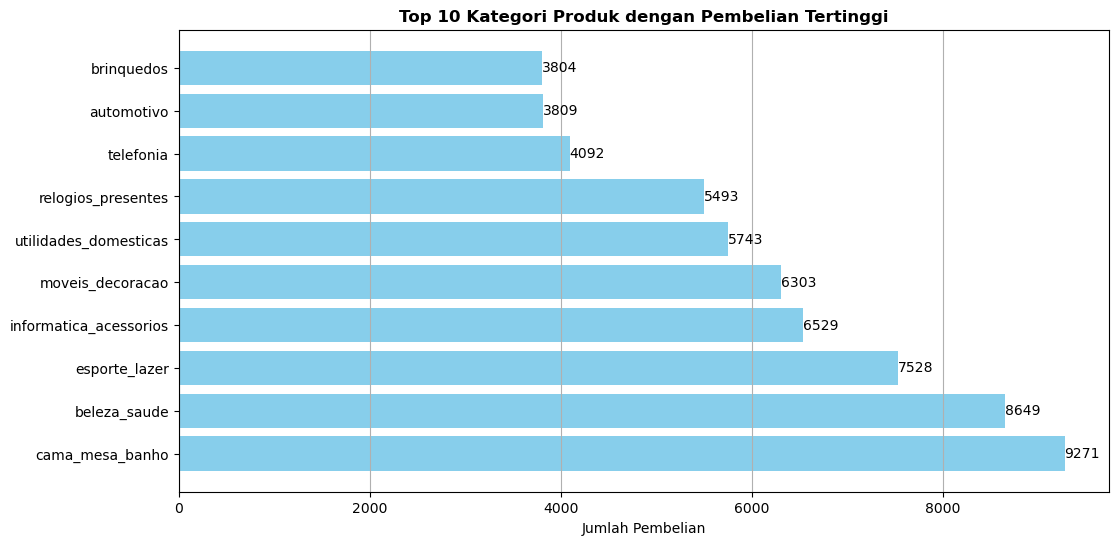

In [801]:
categories = result['product_category_name']
purchase_counts = result['purchase_count']

plt.figure(figsize=(12, 6))
bars = plt.barh(categories, purchase_counts, color='skyblue')
plt.xlabel('Jumlah Pembelian')
plt.title('Top 10 Kategori Produk dengan Pembelian Tertinggi', fontweight="bold")
plt.grid(axis='x')


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            f'{int(bar.get_width())}', va='center')

plt.show()

VISUALISASI 2 - PERTANYAAN BISNIS 1 : Menampilkan rata-rata berat dan volume pada top 10 produk pembelian tertinggi dan perbandingannya dengan rata-rata berat dan volume keseluruhan produk

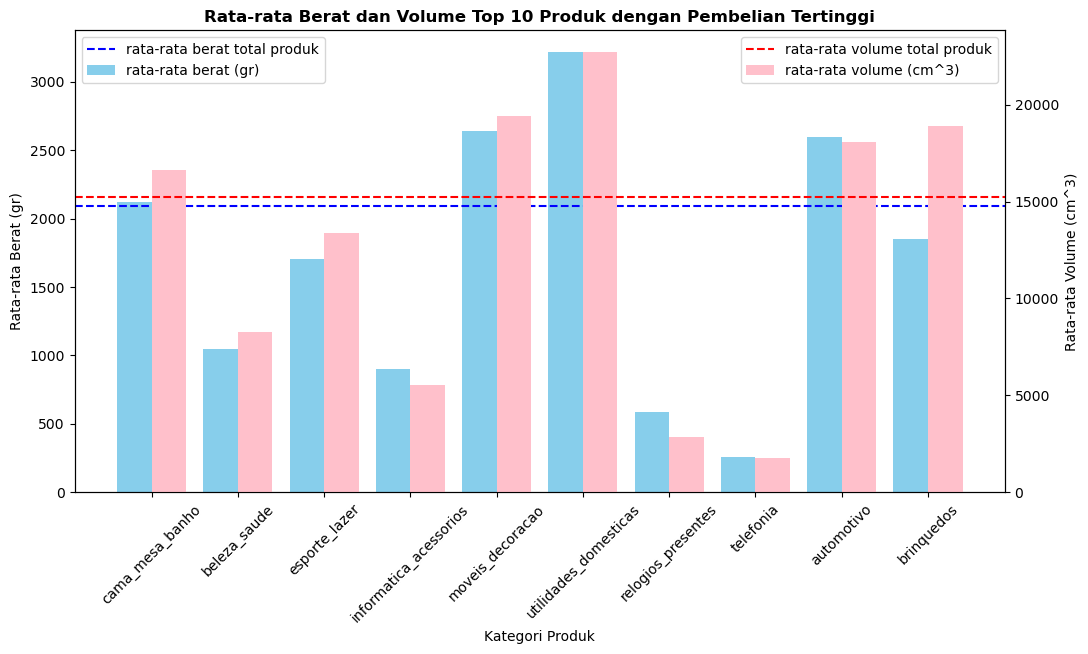

In [812]:
weights = result['average_weight']
volumes = result['average_volume']

fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x = np.arange(len(result['product_category_name']))

bars_weight = ax1.bar(x, weights, width=bar_width, label='rata-rata berat (gr)', color='skyblue')

ax2 = ax1.twinx()
bars_volume = ax2.bar(x + bar_width, volumes, width=bar_width, label='rata-rata volume (cm^3)', color='pink')

ax1.axhline(rata_rata_berat, color='blue', linestyle='--', label='rata-rata berat total produk')
ax2.axhline(rata_rata_volume, color='red', linestyle='--', label='rata-rata volume total produk')

ax1.set_xlabel('Kategori Produk')
ax1.set_ylabel('Rata-rata Berat (gr)')
ax2.set_ylabel('Rata-rata Volume (cm^3)')
ax1.set_title('Rata-rata Berat dan Volume Top 10 Produk dengan Pembelian Tertinggi', fontweight='bold')
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(result['product_category_name'], rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### Pertanyaan 2 : Bagaimana pengaruh demografis wilayah customer terhadap lamanya waktu pengiriman produk tersebut ?

untuk menjawab pertanyaan bisnis yang kedua itu, langkah pertama yang saya lakukan dibawah ini adalah menghitung rata-rata waktu pengiriman untuk masing-masing kota customers

saya mendefinisikan nya dengan mengelompokkan data berdasarkan kota customers dengan value nya adalah delivery time dan menggunakan function mean() untuk mendapat nilai rata-ratanya

In [807]:
avg_delivery_time_per_city = all_data_df.groupby('customer_city')['delivery_time (day)'].mean().reset_index()
avg_delivery_time_per_city.columns = ['customer_city', 'avg_delivery_time']
avg_delivery_time_per_city = avg_delivery_time_per_city.sort_values(by='avg_delivery_time', ascending=False).reset_index(drop=True)
avg_delivery_time_per_city.head(10)

,customer_city,avg_delivery_time
0,novo brasil,148.00
1,capinzal do norte,109.00
2,adhemar de barros,97.00
3,santa cruz de goias,86.00
4,arace,85.75
5,marcelino vieira,78.00
6,serra dos dourados,74.00
7,aramari,73.00
8,humildes,71.00
9,machadinho,65.00


dibawah ini, saya melakukan perhitungan yang sama, tetapi kali ini menghitung rata-rata waktu pengiriman untuk masing-masing wilayah/state customers

In [804]:
avg_delivery_time_per_state = all_data_df.groupby('customer_state')['delivery_time (day)'].mean().reset_index()
avg_delivery_time_per_state.columns = ['customer_state', 'avg_delivery_time']
avg_delivery_time_per_state = avg_delivery_time_per_state.sort_values(by='avg_delivery_time', ascending=False).reset_index(drop=True)
avg_delivery_time_per_state.head(10)

,customer_state,avg_delivery_time
0,RR,27.826087
1,AP,27.753086
2,AM,25.963190
3,AL,23.992974
4,PA,23.301708
5,MA,21.214018
6,SE,20.978667
7,CE,20.538947
8,AC,20.329670
9,PB,20.119454


lalu dibawah ini, saya ingin mengembangkan informasi terkait data rata-rata waktu pengiriman untuk masing-masing wilayah/state customers. saya menambahkan jumlah penjualan atau berapa banyak customer dari 10 wilayah tersebut melakukan pembelian

In [805]:
penjualan_tiap_wilayah = all_data_df.groupby('customer_state')['order_id'].nunique().reset_index()
penjualan_tiap_wilayah.columns = ['customer_state', 'sales_count']

state_analysis = pd.merge(avg_delivery_time_per_state, penjualan_tiap_wilayah, on='customer_state')
state_analysis.head(10)

,customer_state,avg_delivery_time,sales_count
0,RR,27.826087,41
1,AP,27.753086,67
2,AM,25.963190,145
3,AL,23.992974,397
4,PA,23.301708,946
5,MA,21.214018,716
6,SE,20.978667,335
7,CE,20.538947,1278
8,AC,20.329670,80
9,PB,20.119454,517


VISUALISASI 1 - PERTANYAAN BISNIS 2 : Menampilkan top 10 rata-rata waktu pengiriman tiap kota customers

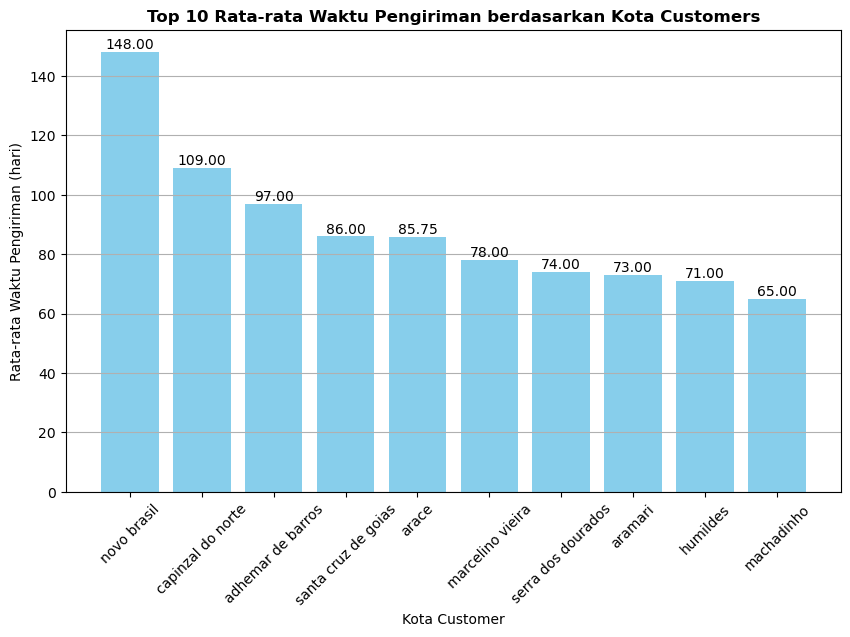

In [810]:
top_10_avg_delivery_time_per_city = avg_delivery_time_per_city.sort_values(by='avg_delivery_time', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_avg_delivery_time_per_city['customer_city'], top_10_avg_delivery_time_per_city['avg_delivery_time'], color='skyblue')
plt.xlabel('Kota Customer')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.title('Top 10 Rata-rata Waktu Pengiriman berdasarkan Kota Customers', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y')

for index, value in enumerate(top_10_avg_delivery_time_per_city['avg_delivery_time']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

VISUALISASI 2 - PERTANYAAN BISNIS 2 : Menampilkan hubungan jumlah pembelian suatu produk terhadap rata-rata waktu pengirimannya

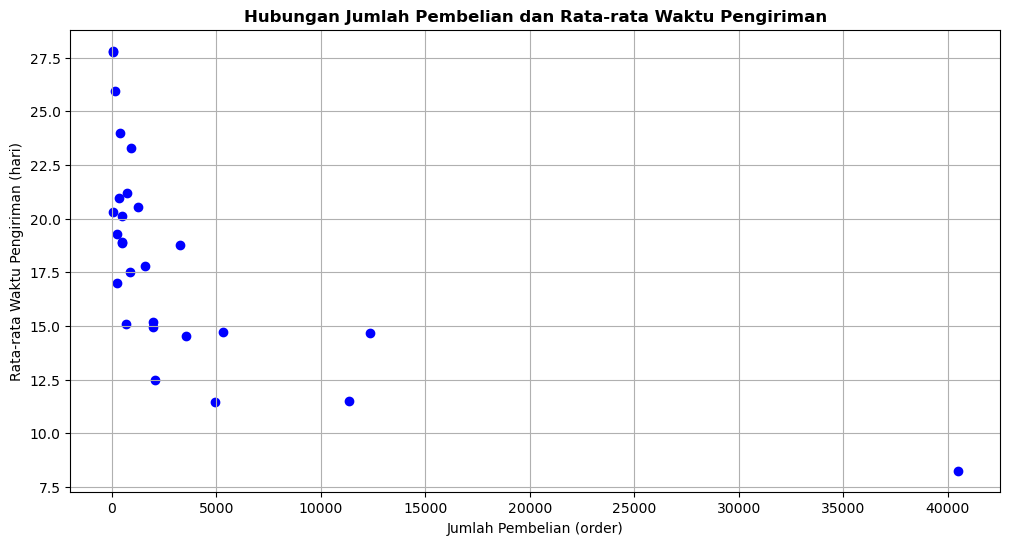

In [811]:
plt.figure(figsize=(12, 6))
plt.scatter(state_analysis['sales_count'], state_analysis['avg_delivery_time'], color='blue')
plt.xlabel('Jumlah Pembelian (order)')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.title('Hubungan Jumlah Pembelian dan Rata-rata Waktu Pengiriman', fontweight='bold')
plt.grid()
plt.show()


**Insight:**
- "cama_mesa_banho" merupakan kategori produk dengan tingkat pembelian tertinggi sebesar 9271 penjualan produk dan merupakan produk yang paling diminati customers, terutama customers dari wilayah SP kota Sao Paulo
- rata-rata ukuran(berat dan volume) suatu produk tidak berpengaruh signifikan terhadap tingkat pembelian atau seberapa laku produk tersebut
- novo brasil menjadi kota customers dengan rata-rata waktu pengiriman produk terlama, yaitu 148 hari. Dan RR menjadi wilayah customers dengan rata-rata waktu pengiriman produk terlama, yaitu sekitar 27 hari
- rata-rata waktu pengiriman suatu produk memiliki dampak yang sangat signifikan terhadap jumlah pembelian yang dilakukan customers

## Analisis Lanjutan (Opsional) - RFM Analysis

data relevan yang akan saya gunakan untuk melakukan RFM Analysis ini adalah customer_unique_id, order_purchase_timestamp, dan total_cost dari dataset keseluruhan

In [813]:
snapshot_date = pd.to_datetime('2024-09-23')

rfm_data = all_data_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - pd.to_datetime(x).max()).days,  
    'order_id': 'nunique',  
    'total_cost': 'sum'  
}).reset_index()

rfm_data.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

rfm_data.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2327,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2330,1,27.19
2,0000f46a3911fa3c0805444483337064,2753,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2537,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2504,1,196.89


langkah berikutnya adalah saya memberi skor berdasarkan kuantil (1-5) untuk Recency, Frequency, dan Monetary. skor tertinggi berarti menunjukkan nilai yang lebih baik

In [814]:
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm_data[['customer_unique_id', 'R_Score', 'F_Score', 'M_Score']].head()

,customer_unique_id,R_Score,F_Score,M_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1
2,0000f46a3911fa3c0805444483337064,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,2,1,4


lalu, saya menggabungkan skor Recency, Frequency, dan Monetary menjadi satu dan menentukan kategori atau segmen customers berdasarkan skor gabungan

In [815]:
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

rfm_data['RFM_Score'] = rfm_data[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm_data.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2327,1,141.90,4,1,4,414,9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2330,1,27.19,4,1,1,411,6
2,0000f46a3911fa3c0805444483337064,2753,1,86.22,1,1,2,112,4
3,0000f6ccb0745a6a4b88665a16c9f078,2537,1,43.62,2,1,1,211,4
4,0004aac84e0df4da2b147fca70cf8255,2504,1,196.89,2,1,4,214,7


terakhir, dibawah ini saya membuat visualisasi sederhana untuk melihat distribusi pelanggan berdasarkan RFM Score

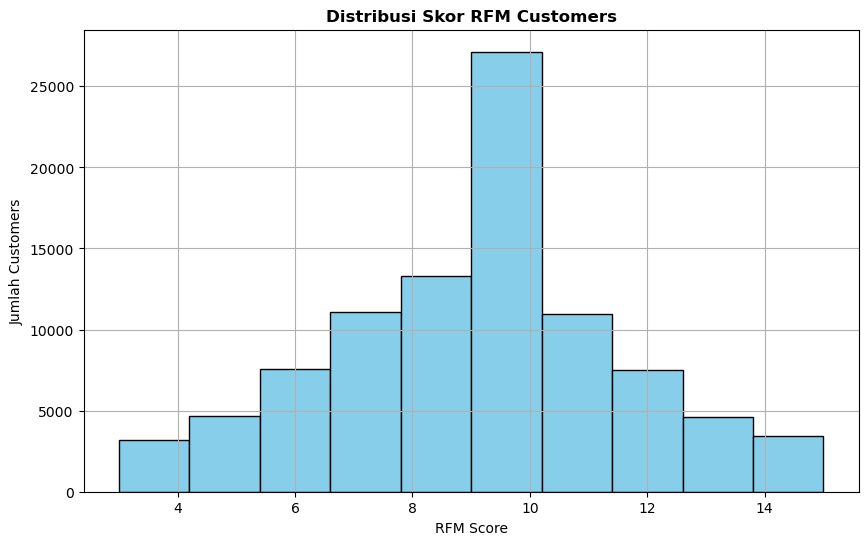

In [817]:
plt.figure(figsize=(10, 6))
plt.hist(rfm_data['RFM_Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribusi Skor RFM Customers', fontweight='bold')
plt.xlabel('RFM Score')
plt.ylabel('Jumlah Customers')
plt.grid(True)

plt.show()


- Bagaimana pengaruh tingkat pembelian suatu produk di wilayah tertentu berdasarkan ukuran produk tersebut ?
- Bagaimana pengaruh demografis wilayah customer terhadap lamanya waktu pengiriman produk tersebut ?

**Insight:**
- "cama_mesa_banho" merupakan kategori produk dengan tingkat pembelian tertinggi sebesar 9271 penjualan produk dan merupakan produk yang paling diminati customers, terutama customers dari wilayah SP kota Sao Paulo
- rata-rata ukuran(berat dan volume) suatu produk tidak berpengaruh signifikan terhadap tingkat pembelian atau seberapa laku produk tersebut
- novo brasil menjadi kota customers dengan rata-rata waktu pengiriman produk terlama, yaitu 148 hari. Dan RR menjadi wilayah customers dengan rata-rata waktu pengiriman produk terlama, yaitu sekitar 27 hari
- rata-rata waktu pengiriman suatu produk memiliki dampak yang sangat signifikan terhadap jumlah pembelian yang dilakukan customers

## Conclusion

- Conclution pertanyaan 1 : tingkat pembelian atau dalam kata lain laris atau tidaknya suatu produk tidak dipengaruhi secara signifikan berdasarkan ukuran produk tersebut. Karena, beberapa produk yang masuk ke dalam top 10 penjualan terlaris dan diminati customers, memiliki ukuran yang jauh diatas rata-rata berat dan volume keseluruhan product yang ada. salah satu contohnya adalah kategori produk "cama_mesa_banho". produk tersebut merupakan kategori produk dengan tingkat pembelian tertinggi sebesar 9271. Namun, rata-rata ukuran (volume) produk tersebut adalah 16611 cm^3 dan produk tersebut berukuran (volume) lebih besar jika dibandingkan dengan rata-rata volume total product yang ada, yaitu 15220 cm^3. jadi, kemungkinan nya adalah tingkat pembelian produk dipengaruhi oleh hal-hal yang lainnya, misal seperti lamanya waktu pengiriman yang didasari oleh demografis customer atau harga dan biaya pengiriman produk tersebut.

- Conclution pertanyaan 2 : rata-rata waktu pengiriman suatu produk memiliki dampak yang sangat signifikan terhadap jumlah pembelian produk yang dilakukan customers. karena berdasarkan pada visualisasi scatter plot diatas, waktu pengiriman produk yang lama atau tinggi, cenderung memiliki jumlah pembelian yang sedikit jika dibandingkan dengan waktu pengiriman yang cepat. dan penyebab dari lamanya waktu pengiriman dapat disebabkan oleh jarak demografis customers dengan penjual yang memang sangat jauh. kasus tersebut juga terjadi terhadap customer yang berwilayah di RR. wilayah RR menjadi wilayah dengan waktu pengiriman produk paling lama, yaitu sekitar 27 hari. dengan pengiriman produk yang lama pada wilayah tersebut, jumlah penjualan produk di wilayah tersebut juga kecil, yaitu di angka 42 penjualan saja jika dibandingkan dengan wilayah-wilayah lain yang memiliki waktu pengiriman yang lebih singkat.